<h3 align="center">Assignment #2 </h3>
<h5 align="center">Eqan Ahmad | BSCS | 7B | ML </h5>

#### Basic Program Setup

In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing # Used only for LabelEncoding for Gender

In [83]:
df = pd.read_csv('data.csv')

In [84]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [85]:
# Feature Selection
df = df.drop('CustomerID', axis=1)


In [86]:
label_encoder = preprocessing.LabelEncoder() 

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [87]:
X = df.iloc[:, [1,2,3]].values # Useful features extracted into the variable X
m=X.shape[0] # number of training examples. Here m=4
n=X.shape[1] # number of features. Here n also equal to 4


n_iter=100
K=5 # number of clusters

*Tested with all of the given features in 1 X variable which resulted in very obliterated clusters as gender and age have a very low gap distance between them and thus came to conclusion that Annual Income and Spending score are the most meaningful parameters to compute Kmeans on, compute clusters and display them on the 2 Dimensional plot*

In [88]:
print("Training Examples: ", X[0])
print("Features: ", X[1])

Training Examples:  [19 15 39]
Features:  [21 15 81]


#### Question #1

##### Step 1: Initialize the centroids randomly from the data points

In [89]:
import random as rd

In [90]:
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]] # Concatenates the Centroid array with a random column from the dataset
print("Computed Centroids For Each Column: \n", Centroids)

Computed Centroids For Each Column: 
 [[65. 31. 36. 52. 49.]
 [63. 72. 37. 23. 42.]
 [52. 71. 26. 29. 52.]]


##### Step 2: 
       1. Computing manhatten distance from each centroid and assign cluster based on the minimal distance.
       2. Then we regroup the clusters and store them in a temporary variable in C.
       3. Find the mean of the separated clusters and assign them as new centroids where Y is the temporary storage and final solution is stored in Output variable.

In [91]:
Output={}
for i in range(n_iter):
    manhattenDistance=np.array([]).reshape(m,0)
    for k in range(K): # Iterating through each cluster and assigning it with the manhatten distance
            tempDist=np.sum(abs(X-Centroids[:,k]),axis=1) # axis 1 here means it will sum along the row
            manhattenDistance=np.c_[manhattenDistance,tempDist]
    C=np.argmin(manhattenDistance,axis=1)+1 # Will return the minimum values along the row

    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(n,0) # Just making the blank cluster array using the feature quantity

    # Using the number of training examples and iterating it with the minimum computed manhatten distances
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # Concatenating Y with Original X values using the organized centroid points we calculated
    # Thus reorganizing all the X values to the Y variable
         
    for k in range(K):
        Y[k+1]=Y[k+1].T # Storing the transpose of the computed Y
        
    for k in range(K):
         Centroids[:,k]=np.mean(Y[k+1],axis=0) # In the end assigning the computed result to the Centroid
    Output = Y

##### Step 3: Applying Elbow Method to find the optimal number of clusters with the K-Mean method
1. Steps involved in ELBOW method are:

    1. Perform K means clustering on different values of K ranging from 1 to any upper limit. Here we are taking the upper limit as 8.
    2. For each K, calculate WCSS[Within-Cluster Sums of Squares]
    3. Plot the value for WCSS with the number of clusters K.
    4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. i.e the point after which WCSS doesn’t decrease more rapidly is the appropriate value of K.

In [92]:
'''
    Combining all of the above said in a function
'''
def Kmean(K):
    Centroids=np.array([]).reshape(n,0) 
    for i in range(K):
        rand=rd.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
    Output={}
    for i in range(n_iter):
        manhattenDistance=np.array([]).reshape(m,0)
        for k in range(K):
                tempDist=np.sum(abs(X-Centroids[:,k]),axis=1)
                manhattenDistance=np.c_[manhattenDistance,tempDist]
        C=np.argmin(manhattenDistance,axis=1)+1

        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(n,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
             
        for k in range(K):
            Y[k+1]=Y[k+1].T
            
        for k in range(K):
             Centroids[:,k]=np.mean(Y[k+1],axis=0)
        Output = Y
    return Output, Centroids.T

WCSS_array=np.array([])

for K in range(1,9):
    Output,Centroids=Kmean(K)
    wcss=0
    for k in range(K):
        wcss+=np.sum(abs(Output[k+1]-Centroids[k,:]))
    WCSS_array=np.append(WCSS_array,wcss)

2. Visualizing the Elbow

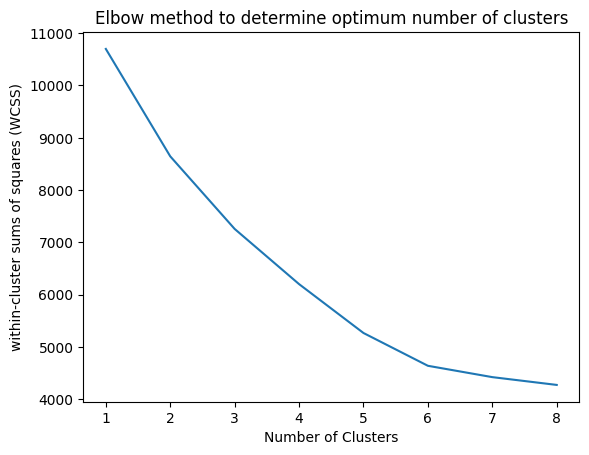

In [93]:
K_array=np.arange(1,9,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

##### Step 4: Visualization of the clusters formed

1. Visualizing Unclustered Data

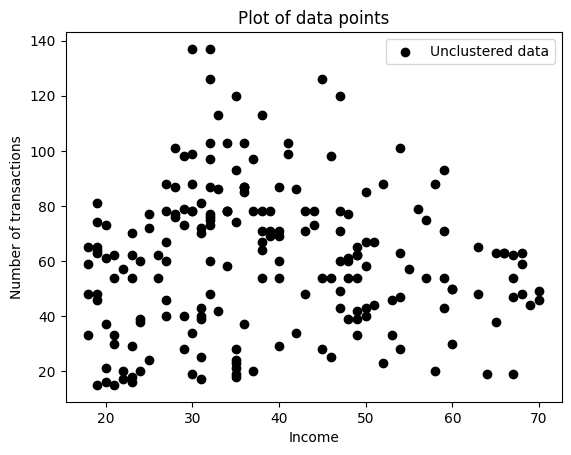

In [94]:
plt.scatter(X[:,0],X[:,1],c='black',label='Unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

2. Visualizing After Performing K-Means Clustering

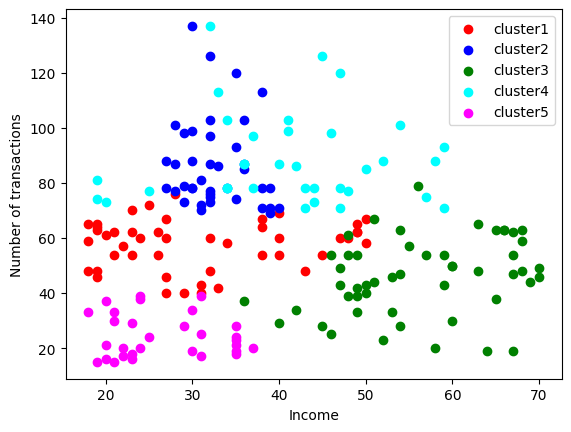

In [95]:
K = 5 # Best performing K value
Output,Centroids=Kmean(K)
Centroids = Centroids.T
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()

### Question #2

#### 1. K-Medoid Algorithm (for k = 2, find the cluster with least total cost)

Same mechanism as Kmeans clustering but instead of taking the mean at the end we add up the cost and compare it to the previous computed cost.
If the currentCost > prevCost we stop and return the previousCost.

In [96]:
def Kmedoid(K, prevCost = 0):
    Centroids=np.array([]).reshape(n,0) 
    for i in range(K):
        rand=rd.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
    currentCost = 0
    for i in range(n_iter):
        manhattenDistance=np.array([]).reshape(m,0)
        for k in range(K):
                tempDist=np.sum(abs(X-Centroids[:,k]),axis=1)
                manhattenDistance=np.c_[manhattenDistance,tempDist]
        C=np.argmin(manhattenDistance,axis=1)+1

        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(n,0)

        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]
        
        for k in range(K):
            Y[k+1]=Y[k+1].T
            
        # Instead of finding the mean computing the cost and adding it up
        for k in range(K):
            currentCost += Y[k+1][0]
            currentCost = currentCost[0]

    # At the end comparing if the current cost is higher than the previous cost recompute again
    if (currentCost < prevCost and prevCost != 0):
        Kmedoid(K, currentCost)
    return currentCost

K = 2
print("Minimal Cost: ", Kmedoid(K))

Minimal Cost:  5400.0
